# ATP Tennis Player Classification

- In this project, I am going to implement a ATP tennis players classifier when their images are given.
1. Dataset : In addition to image data I have, I will collect specific players by web-scrapping.
2. Preprocessing : crop images with face detection
3. Transformation / Feature Engineering : wavelet 
4. Prepare training dataset : Stacking
5. Model Training :
6. GridSearchCV : 
7. Performance Evaluation :
8. Save the model :
9. Work with Webapp :

In [562]:
from bs4 import BeautifulSoup
import PIL
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
import time
import io
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Data Collection
### 1. Scrapping Images from website
- In this section, we will collect a raw images from website by web-scraping.
- By using Selenium automation features, we will simulate to click thumbnails, to scroll and get  
better resolution of images from google.

In [217]:
#url for ATP players
urls = {
    "Raphael_Nadal" : "https://www.google.com/search?sca_esv=561819559&rlz=1C5CHFA_enUS941US941&sxsrf=AB5stBjNhE9VBJMQWX8KNrSzDYcJm6BRmg:1693536690923&q=rafael+nadal&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjDlYHns4iBAxX7h-4BHambCMYQ0pQJegQIDRAB&biw=1920&bih=938&dpr=1",
    "Roger_Federer" : "https://www.google.com/search?q=roger+federer&tbm=isch&ved=2ahUKEwiOyfTH54iBAxXnJkQIHdEmDgoQ2-cCegQIABAA&oq=roger+&gs_lcp=CgNpbWcQARgAMgQIIxAnMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzILCAAQgAQQsQMQgwEyBQgAEIAEMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDOg0IABCKBRCxAxCDARBDOgQIABADOgcIABCKBRBDOggIABCxAxCDAVDOC1jUDmDnFWgAcAB4AIABSogBpAOSAQE3mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=-IfxZI7tFOfNkPIP0c24UA&bih=938&biw=1920&rlz=1C5CHFA_enUS941US941",
    "Carlos_Alcaraz" : "https://www.google.com/search?q=carlos+alcaraz&tbm=isch&ved=2ahUKEwij0OLX5oiBAxXdNUQIHUIsCfAQ2-cCegQIABAA&oq=carlos&gs_lcp=CgNpbWcQARgAMggIABCxAxCDATIICAAQgAQQsQMyCwgAEIAEELEDEIMBMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzoECCMQJzoFCAAQgAQ6BwgAEIoFEEM6CggAEIoFELEDEEM6BwgjEOoCECdQggVYtD9gqkpoAXAAeACAAT-IAdMDkgEBOJgBAKABAaoBC2d3cy13aXotaW1nsAEKwAEB&sclient=img&ei=DYfxZOOVCt3rkPIPwtikgA8&bih=938&biw=1920&rlz=1C5CHFA_enUS941US941",
    "Stan_Wawrinka" : "https://www.google.com/search?q=stan+wawrinka&tbm=isch&ved=2ahUKEwju4LDj5oiBAxUtC0QIHb5oDdkQ2-cCegQIABAA&oq=stan+wa&gs_lcp=CgNpbWcQARgAMgsIABCABBCxAxCDATILCAAQgAQQsQMQgwEyCwgAEIAEELEDEIMBMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoECAAQAzoJCAAQGBCABBAKOgcIIxDqAhAnOgcIABCKBRBDOggIABCABBCxAzoICAAQsQMQgwFQ4AFYxjNg-zxoAXAAeACAAT6IAf8DkgEBOZgBAKABAaoBC2d3cy13aXotaW1nsAEKwAEB&sclient=img&ei=JYfxZK66H62WkPIPvtG1yA0&bih=938&biw=1920&rlz=1C5CHFA_enUS941US941",
    "Denis_Shapovalov" : "https://www.google.com/search?q=shapovalov&tbm=isch&ved=2ahUKEwj767Lv5oiBAxUNNEQIHTdACU0Q2-cCegQIABAA&oq=shapo&gs_lcp=CgNpbWcQARgAMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoLCAAQgAQQsQMQgwE6BwgAEIoFEEM6CAgAEIAEELEDOgoIABCKBRCxAxBDOgYIABAIEB46CQgAEBgQgAQQCjoHCAAQGBCABFCYIVjhP2DSSWgGcAB4AIABSYgB4gWSAQIxMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=PofxZPvUK43okPIPt4Cl6AQ&bih=938&biw=1920&rlz=1C5CHFA_enUS941US941",
    "Gael_Monfils" : "https://www.google.com/search?q=gael+monfils&tbm=isch&ved=2ahUKEwjv6sLF54iBAxVhIUQIHcXUBAcQ2-cCegQIABAA&oq=gael+monfils&gs_lcp=CgNpbWcQAzINCAAQigUQsQMQgwEQQzILCAAQgAQQsQMQgwEyBAgAEAMyBwgAEIoFEEMyBAgAEAMyBwgAEIoFEEMyBwgAEIoFEEMyBQgAEIAEMgcIABCKBRBDMgUIABCABDoECCMQJzoGCAAQBxAeUKwJWIAOYKYPaABwAHgAgAFDiAHzApIBATaYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=84fxZK-lFOHCkPIPxamTOA&bih=938&biw=1920&rlz=1C5CHFA_enUS941US941"
}

In [216]:
def get_images_from_google(wd, delay, max_images, player=""):
    def scroll_down(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        time.sleep(3)

    url = urls[player]
    wd.get(url)    
    imageUrls = set()

    while len(imageUrls) < max_images:
#         print('imageurls :', imageUrls)
        #catch thumbnail images by common class name for thumbnails
        thumbnails = wd.find_elements(By.CLASS_NAME, "Q4LuWd")
        print("Thumbnails :", len(thumbnails))
        #iterating thumbnails
        for tn in thumbnails[len(imageUrls)::]:
            #break condition
            if len(imageUrls) >= max_images:
                break
            #click thumbnail
            try:
                tn.click()
                time.sleep(delay)
            except:
                continue
            #get actual image for each thumbnail
            images = wd.find_elements(By.CLASS_NAME, "r48jcc.pT0Scc.iPVvYb") #replace ' ' with '.'
            for img in images:
                #if duplicates
                if img.get_attribute("src") in imageUrls:
                    max_images += 1
                    break
                #collect data
                if img.get_attribute("src") and "http" in img.get_attribute("src"):
                    imageUrls.add(img.get_attribute("src"))
                    if len(imageUrls) >= max_images:
                        break
                    print(f"{len(imageUrls)}/{max_images} images collected")
        #after iterating thumbnails, scroll down
        scroll_down(wd)        
        
    return imageUrls

In [224]:
# Collect images urls
# PATH = "../chromedriver_mac_arm64/chromedriver"
# wd.get("https://www.google.com/search?sca_esv=561819559&rlz=1C5CHFA_enUS941US941&sxsrf=AB5stBjNhE9VBJMQWX8KNrSzDYcJm6BRmg:1693536690923&q=rafael+nadal&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjDlYHns4iBAxX7h-4BHambCMYQ0pQJegQIDRAB&biw=1920&bih=938&dpr=1")
wd = webdriver.Chrome()
carlosUrls = get_images_from_google(wd, 0.5, 100, player="Carlos_Alcaraz")
rogerUrls = get_images_from_google(wd, 1, 100, player="Roger_Federer")
stanUrls = get_images_from_google(wd, 1, 100, player="Stan_Wawrinka")
denisUrls = get_images_from_google(wd, 1, 100, player="Denis_Shapovalov")
gaelUrls = get_images_from_google(wd, 1, 100, player="Gael_Monfils")
wd.quit()


imageurls : set()
Thumbnails : 48
1/100 images collected
2/100 images collected
3/100 images collected
4/100 images collected
5/100 images collected
6/100 images collected
7/100 images collected
8/100 images collected
9/100 images collected
10/100 images collected
11/100 images collected
12/100 images collected
13/100 images collected
14/100 images collected
15/100 images collected
16/100 images collected
17/100 images collected
18/100 images collected
19/100 images collected
20/100 images collected
21/100 images collected
22/100 images collected
23/100 images collected
imageurls : {'https://imageio.forbes.com/specials-images/imageserve/5e7b54939f46de0006e48f1c/The-Match-in-Africa--Roger-Federer-v-Rafael-Nadal/960x0.jpg?format=jpg&width=960', 'https://www.tennisworldusa.org/imgb/137965/rafael-nadal-on-beating-roger-federer-i-do-not-know-how-i-did-it-.webp', 'https://cdn.britannica.com/23/188723-050-332EE886/Roger-Federer-US-Open-2014.jpg', 'https://robbreport.com/wp-content/uploads/202

imageurls : {'https://imageio.forbes.com/specials-images/imageserve/5e7b54939f46de0006e48f1c/The-Match-in-Africa--Roger-Federer-v-Rafael-Nadal/960x0.jpg?format=jpg&width=960', 'https://www.tennisworldusa.org/imgb/137965/rafael-nadal-on-beating-roger-federer-i-do-not-know-how-i-did-it-.webp', 'https://cdn.britannica.com/23/188723-050-332EE886/Roger-Federer-US-Open-2014.jpg', 'https://robbreport.com/wp-content/uploads/2023/08/GettyImages-1128192981.jpg?w=1000', 'https://hips.hearstapps.com/hmg-prod/images/gettyimages-1322028686.jpg?crop=1.00xw:1.00xh;0,0&resize=1200:*', 'https://cloudfront-us-east-2.images.arcpublishing.com/reuters/6SLP3CFO7BO3PKVO2ZIRN4IK2E.jpg', 'https://i.cbc.ca/1.6583766.1692147119!/fileImage/httpImage/federer-roger-091522.jpg', 'https://www.atptour.com/-/media/tennis/players/gladiator/2020/03/23/10/19/federer_full_ao20.png', 'https://images.mid-day.com/images/images/2023/may/roger-nadal-incent_d.jpg', 'https://iflwatches.com/cdn/shop/articles/roger-federer-watch-col

24/112 images collected
25/112 images collected
26/112 images collected
27/112 images collected
28/112 images collected
29/112 images collected
30/112 images collected
31/112 images collected
32/112 images collected
33/112 images collected
34/112 images collected
35/112 images collected
36/112 images collected
37/112 images collected
38/112 images collected
39/112 images collected
40/112 images collected
41/112 images collected
42/112 images collected
43/112 images collected
44/112 images collected
45/112 images collected
46/112 images collected
47/112 images collected
48/112 images collected
49/112 images collected
50/112 images collected
51/112 images collected
52/112 images collected
53/112 images collected
54/112 images collected
55/112 images collected
56/112 images collected
57/112 images collected
58/112 images collected
59/112 images collected
60/112 images collected
61/112 images collected
62/112 images collected
63/112 images collected
64/112 images collected
65/112 images co

92/113 images collected
93/116 images collected
94/116 images collected
95/116 images collected
96/116 images collected
97/116 images collected
98/116 images collected
99/116 images collected
100/116 images collected
101/116 images collected
102/116 images collected
103/116 images collected
104/116 images collected
105/116 images collected
106/116 images collected
107/116 images collected
108/116 images collected
109/116 images collected
110/116 images collected
111/116 images collected
112/116 images collected
113/116 images collected
114/116 images collected
115/116 images collected
imageurls : set()
Thumbnails : 50
1/100 images collected
2/100 images collected
3/100 images collected
4/100 images collected
5/100 images collected
6/100 images collected
7/100 images collected
8/100 images collected
9/100 images collected
10/100 images collected
11/100 images collected
12/100 images collected
13/100 images collected
14/100 images collected
15/100 images collected
16/100 images collected

39/109 images collected
40/109 images collected
41/109 images collected
42/109 images collected
43/109 images collected
44/109 images collected
45/109 images collected
46/109 images collected
47/109 images collected
48/109 images collected
49/109 images collected
50/109 images collected
51/109 images collected
52/109 images collected
53/109 images collected
54/109 images collected
55/109 images collected
56/109 images collected
57/109 images collected
58/109 images collected
59/109 images collected
60/109 images collected
61/109 images collected
62/109 images collected
63/109 images collected
64/109 images collected
65/109 images collected
66/109 images collected
67/109 images collected
68/109 images collected
69/109 images collected
70/109 images collected
71/109 images collected
72/109 images collected
73/109 images collected
74/109 images collected
75/109 images collected
76/109 images collected
77/109 images collected
78/109 images collected
79/109 images collected
80/109 images co

65/104 images collected
66/104 images collected
67/104 images collected
68/104 images collected
69/104 images collected
70/104 images collected
71/104 images collected
72/104 images collected
73/104 images collected
74/104 images collected
75/104 images collected
76/104 images collected
77/104 images collected
78/104 images collected
79/104 images collected
80/104 images collected
81/104 images collected
82/104 images collected
83/104 images collected
84/104 images collected
85/104 images collected
86/104 images collected
87/104 images collected
88/104 images collected
89/104 images collected
90/104 images collected
91/104 images collected
92/104 images collected
93/104 images collected
94/104 images collected
95/104 images collected
96/104 images collected
97/104 images collected
98/104 images collected
99/104 images collected
100/104 images collected
101/104 images collected
102/104 images collected
103/104 images collected


In [249]:
# check the amount of collected data
print(len(carlosUrls))
print(len(rogerUrls))
print(len(stanUrls))
print(len(denisUrls))
print(len(gaelUrls))

107
116
118
109
104


### 2. Strore URL in dataframe
- Here, we store the collected urls in dataframe and save it for later use.
- In this case, we collected 100+ images for each player. The number of training data for each player  
is important due to data imbalnace.

In [359]:
carlos_df = pd.DataFrame(carlosUrls, columns=["Carlos_Alcaraz"])
roger_df = pd.DataFrame(rogerUrls, columns=["Roger_Federer"])
stan_df = pd.DataFrame(stanUrls, columns=["Stan_Wawrinka"])
denis_df = pd.DataFrame(denisUrls, columns=["Denis_Shapovalov"])
gael_df = pd.DataFrame(gaelUrls, columns=["Gael_Monfils"])

total_image_urls = pd.concat([carlos_df, roger_df, stan_df, denis_df, gael_df],axis=1)
total_image_urls.head()

,Carlos_Alcaraz,Roger_Federer,Stan_Wawrinka,Denis_Shapovalov,Gael_Monfils
0,https://library.sportingnews.com/2022-09/Alcar...,https://cdn.britannica.com/23/188723-050-332EE...,https://www.tennisworldusa.org/imgb/138120/sta...,https://smartcdn.gprod.postmedia.digital/toron...,https://i.insider.com/5c46f2d22bdd7f361c231382...
1,https://api.time.com/wp-content/uploads/2022/0...,https://wwd.com/wp-content/uploads/2023/06/Get...,https://www.insidesport.in/wp-content/uploads/...,https://www.tennisworldusa.org/imgb/129972/den...,https://firstsportz.com/wp-content/uploads/202...
2,https://www.tennisworldusa.org/imgb/137421/car...,https://media.architecturaldigest.com/photos/6...,https://cdn.vox-cdn.com/thumbor/-S2BMBf2afWMYS...,https://library.sportingnews.com/2022-01/nadal...,https://www.tennisworldusa.org/imgb/137245/gae...
3,https://d2me2qg8dfiw8u.cloudfront.net/content/...,https://robbreport.com/wp-content/uploads/2023...,https://www.stanwawrinka.com/wp-content/upload...,https://nbcsports.brightspotcdn.com/dims4/defa...,https://www.atptour.com/-/media/images/news/20...
4,https://cdn-wp.thesportsrush.com/2023/08/8d6a8...,https://hips.hearstapps.com/hmg-prod/images/ge...,https://www.denverpost.com/wp-content/uploads/...,https://www.atptour.com/en/news/www.atptour.co...,https://static.foxnews.com/foxnews.com/content...


In [364]:
#save&load to csv
total_image_urls.to_csv('Player_Images_URLs')
df = pd.read_csv('Player_Images_URLs')
df.head()

,Unnamed: 0,Carlos_Alcaraz,Roger_Federer,Stan_Wawrinka,Denis_Shapovalov,Gael_Monfils
0,0,https://library.sportingnews.com/2022-09/Alcar...,https://cdn.britannica.com/23/188723-050-332EE...,https://www.tennisworldusa.org/imgb/138120/sta...,https://smartcdn.gprod.postmedia.digital/toron...,https://i.insider.com/5c46f2d22bdd7f361c231382...
1,1,https://api.time.com/wp-content/uploads/2022/0...,https://wwd.com/wp-content/uploads/2023/06/Get...,https://www.insidesport.in/wp-content/uploads/...,https://www.tennisworldusa.org/imgb/129972/den...,https://firstsportz.com/wp-content/uploads/202...
2,2,https://www.tennisworldusa.org/imgb/137421/car...,https://media.architecturaldigest.com/photos/6...,https://cdn.vox-cdn.com/thumbor/-S2BMBf2afWMYS...,https://library.sportingnews.com/2022-01/nadal...,https://www.tennisworldusa.org/imgb/137245/gae...
3,3,https://d2me2qg8dfiw8u.cloudfront.net/content/...,https://robbreport.com/wp-content/uploads/2023...,https://www.stanwawrinka.com/wp-content/upload...,https://nbcsports.brightspotcdn.com/dims4/defa...,https://www.atptour.com/-/media/images/news/20...
4,4,https://cdn-wp.thesportsrush.com/2023/08/8d6a8...,https://hips.hearstapps.com/hmg-prod/images/ge...,https://www.denverpost.com/wp-content/uploads/...,https://www.atptour.com/en/news/www.atptour.co...,https://static.foxnews.com/foxnews.com/content...


### 3. Dropping Columns

In [377]:
#check null value
df = df.drop(columns=['Unnamed: 0'])
df

,Carlos_Alcaraz,Roger_Federer,Stan_Wawrinka,Denis_Shapovalov,Gael_Monfils
0,https://library.sportingnews.com/2022-09/Alcar...,https://cdn.britannica.com/23/188723-050-332EE...,https://www.tennisworldusa.org/imgb/138120/sta...,https://smartcdn.gprod.postmedia.digital/toron...,https://i.insider.com/5c46f2d22bdd7f361c231382...
1,https://api.time.com/wp-content/uploads/2022/0...,https://wwd.com/wp-content/uploads/2023/06/Get...,https://www.insidesport.in/wp-content/uploads/...,https://www.tennisworldusa.org/imgb/129972/den...,https://firstsportz.com/wp-content/uploads/202...
2,https://www.tennisworldusa.org/imgb/137421/car...,https://media.architecturaldigest.com/photos/6...,https://cdn.vox-cdn.com/thumbor/-S2BMBf2afWMYS...,https://library.sportingnews.com/2022-01/nadal...,https://www.tennisworldusa.org/imgb/137245/gae...
3,https://d2me2qg8dfiw8u.cloudfront.net/content/...,https://robbreport.com/wp-content/uploads/2023...,https://www.stanwawrinka.com/wp-content/upload...,https://nbcsports.brightspotcdn.com/dims4/defa...,https://www.atptour.com/-/media/images/news/20...
4,https://cdn-wp.thesportsrush.com/2023/08/8d6a8...,https://hips.hearstapps.com/hmg-prod/images/ge...,https://www.denverpost.com/wp-content/uploads/...,https://www.atptour.com/en/news/www.atptour.co...,https://static.foxnews.com/foxnews.com/content...
...,...,...,...,...,...
113,NaN,https://hips.hearstapps.com/hmg-prod/images/ro...,https://devdiscourse.blob.core.windows.net/dev...,NaN,NaN
114,NaN,https://cdn.images.express.co.uk/img/dynamic/7...,https://tennisbuzz.net/.image/ar_1:1%2Cc_fill%...,NaN,NaN
115,NaN,https://people.com/thmb/482bl2RoU0Ktxohz5qXcOX...,https://img.olympicchannel.com/images/image/pr...,NaN,NaN
116,NaN,NaN,https://vz.cnwimg.com/wp-content/uploads/2015/...,NaN,NaN


In [496]:
print('Data Info: ')
print(df.info())

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Carlos_Alcaraz    107 non-null    object
 1   Roger_Federer     116 non-null    object
 2   Stan_Wawrinka     118 non-null    object
 3   Denis_Shapovalov  109 non-null    object
 4   Gael_Monfils      104 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB
None


In [497]:
print('<Null Data Count>')
print(df.isna().sum())

<Null Data Count>
Carlos_Alcaraz      11
Roger_Federer        2
Stan_Wawrinka        0
Denis_Shapovalov     9
Gael_Monfils        14
dtype: int64


Text(0, 0.5, 'Count')

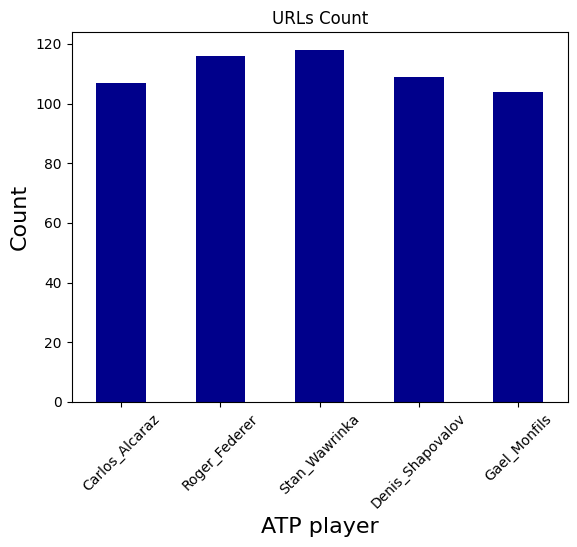

In [489]:
#check null value
df.notnull().sum().plot(kind='bar',color='darkblue')
plt.xticks(rotation=45)
plt.title('URLs Count')
plt.xlabel('ATP player')
plt.ylabel('Count')

- At this point, the number of valid data are similar over each player.
- Later, we will manually delete unnecesary data after we crop the faces from images.

### 3. Download Image data from URLs
- Here, we create a directories along the dataset we collected
- Directory structure: **model / ImageData / 'player's name'**

In [421]:
def download_images(download_path, url, file_name):
    #request
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")
        
    #download
    try:
        image = Image.open(io.BytesIO(image_content))
        file_path = os.path.join(download_path, file_name)

        image.save(file_path+'.jpg', 'jpeg')
#         print("Image Saved!")
            
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [419]:
os.getcwd()

'/Users/junnek92/Desktop/Self-Studying/Side project/Celeb_Face_Classification/model'

In [431]:
test1 = df['Carlos_Alcaraz'][0]
test2 = df['Roger_Federer'][0]
test3 = df['Stan_Wawrinka'][0]
test4 = df['Denis_Shapovalov'][0]
test5 = df['Gael_Monfils'][0]
test_path = os.path.join(os.getcwd(),'test_images')
download_images(test_path, test1, 'testing1')
download_images(test_path, test2, 'testing2')
download_images(test_path, test3, 'testing3')
download_images(test_path, test4, 'testing4')
download_images(test_path, test5, 'testing5')

In [422]:
# create directory
dataset_path = "./ImageData"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)

#for each player
names = df.columns.tolist()
for name in names:
    count = 0
    player_dir = os.path.join(dataset_path, name)
    
    # Create each player's directory
    if not os.path.exists(player_dir):
        os.mkdir(player_dir)
    
    print(player_dir)
    #download urls
    for url in df[name]:
        download_images(player_dir, url, name+str(count))
        count += 1
        

./ImageData/Carlos_Alcaraz
ERROR - Could not save https://www.hindustantimes.com/ht-img/img/2023/06/10/550x309/TENNIS-FRA-OPEN-2023-479_1686377551113_1686377732378.jpg - cannot identify image file <_io.BytesIO object at 0x14e9b1f30>
ERROR - Could not save https://www.hindustantimes.com/ht-img/img/2023/06/25/550x309/COMBO-TENNIS-FRA-OPEN-2023-4_1686283578315_1687699090561.jpg - cannot identify image file <_io.BytesIO object at 0x16d4e0c70>
ERROR - Could not save https://s3-eu-west-2.amazonaws.com/photos.thearticle.com/app/production/articles/4843/flushing-meadows-hails-a-new-champion-carlos-alcaraz.jpg - cannot write mode RGBA as JPEG
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot access local variable 'image_content' where it is not associated with a value
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot acce

ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot access local variable 'image_content' where it is not associated with a value
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot access local variable 'image_content' where it is not associated with a value
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot access local variable 'image_content' where it is not associated with a value
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - cannot access local variable 'image_content' where it is not associated with a value
ERROR - Could not download nan - Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?
ERROR - Could not save nan - canno

## 2. Test images Visualization
- Here, I plot one of the test images from dataset. Nice forehand, Stan!

In [472]:
img = cv2.imread('./test_images/testing3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(565, 848, 3)

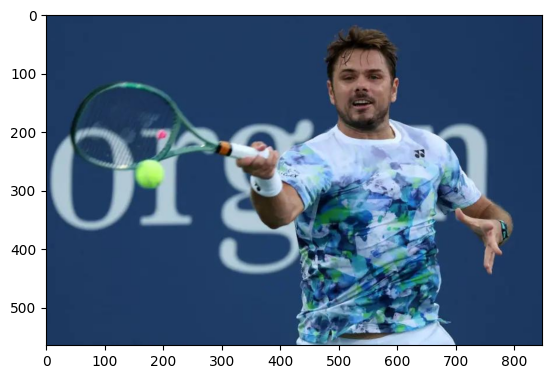

In [473]:
plt.imshow(img)

In [474]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(565, 848)

In [475]:
gray

array([[53, 53, 53, ..., 49, 49, 49],
       [53, 53, 53, ..., 49, 49, 49],
       [53, 53, 53, ..., 49, 49, 49],
       ...,
       [52, 52, 52, ..., 51, 51, 51],
       [52, 52, 52, ..., 51, 51, 51],
       [52, 52, 52, ..., 51, 51, 51]], dtype=uint8)

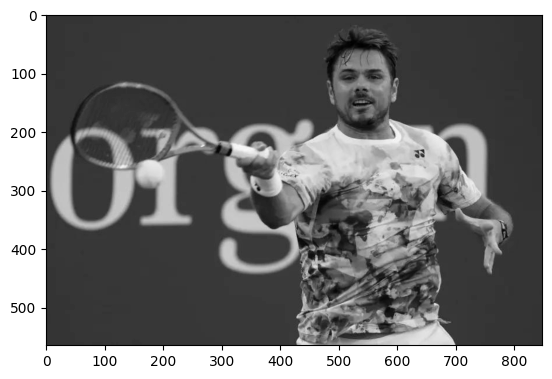

In [476]:
plt.imshow(gray,cmap='gray')

## 3. Feature Engineering-1
### - Face Detection using Haar Cascade algorithm
- Once we collect the image data, we want to make our data more robust in order to train ML models.
- Since our goal is to classify an image based on the face shown in images, we can make it more focused by cropping the region of face in the image.
- We will use Haar Cascade algorithm from openCV library.

In [498]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces #x,y,width,height

array([[479,  61, 119, 119]], dtype=int32)

In [500]:
(x,y,w,h) = faces[0]
x,y,w,h

(479, 61, 119, 119)

### 3-a. Detected Face Region on images 

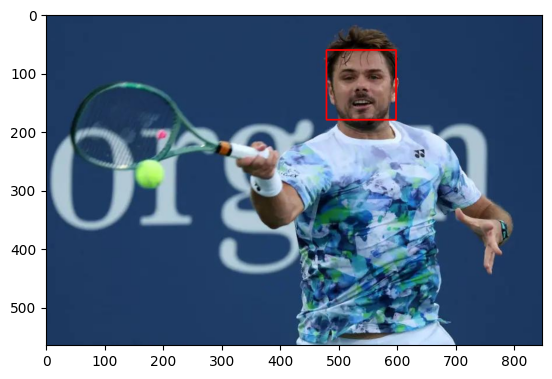

In [479]:
#draw red rectangle
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

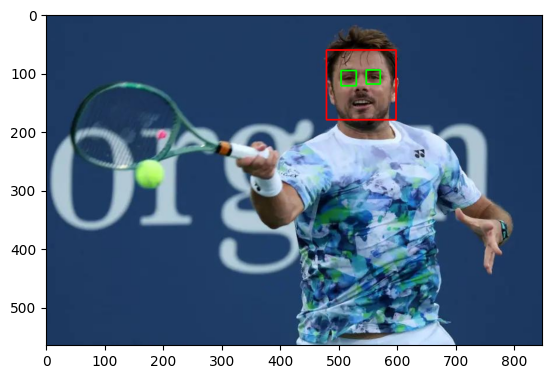

In [480]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

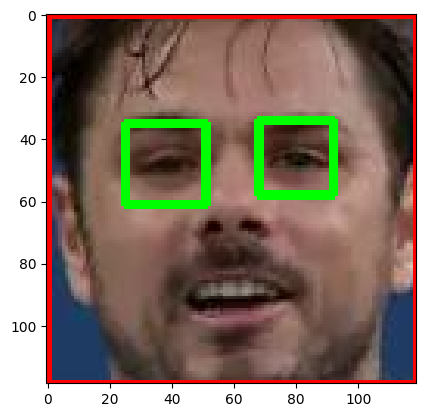

In [481]:
plt.imshow(roi_color, cmap='gray')

### 3-b. Function implementation 
- While implementing a function capturing faces with 2 eyes, we want to make sure we crop the image ONLY IF both eyes are properly detected.
- If the algorithm performs very poor, then we might need to adjust the algorithm by detecting just 1 eye at least, and take it as a valid image.

In [701]:
# Crop an image with both eyes detected
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        #if 2 eyes are there!
        if len(eyes) >= 2:
            return roi_color
    return None

#Crop an image with one eye
def get_cropped_image_if_1_eye(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        #if 2 eyes are there!
        if len(eyes) >= 1:
            return roi_color
    return None

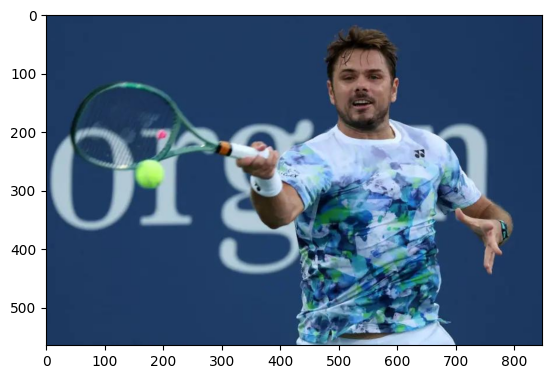

In [511]:
original_img = cv2.imread('./test_images/testing3.jpg')
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

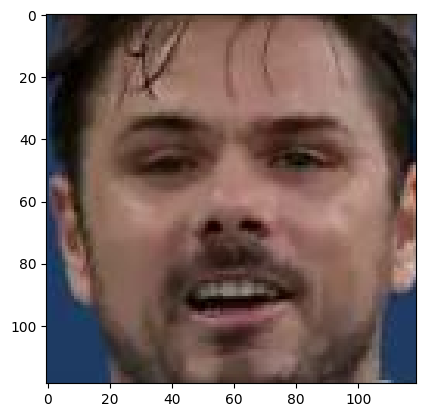

In [512]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/testing3.jpg')
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

### 3-c. Invalid data
- While we had a pretty good result as shown above, there are some data that cannot be detected by our algorithm.
- Note that our function return 'NONE' as both 2 eyes didn't get detected.

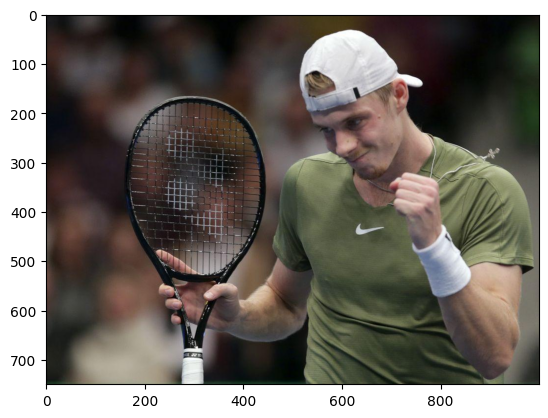

In [525]:
#for data we don't want to count in
wrong_img = cv2.imread('./test_images/testing4.jpg')
plt.imshow(cv2.cvtColor(wrong_img, cv2.COLOR_BGR2RGB))

In [527]:
cropped_img2 = get_cropped_image_if_2_eyes('./test_images/testing4.jpg')
cropped_img2 #returned None
type(cropped_img2)

NoneType

## 4. Collect Cropped images
- Here, we will collect the cropped images in seperate directory 

In [707]:
path_to_data = './ImageData/'
path_to_cr_data = './ImageData/ImageCrop/'
path_to_cr_data1 = './ImageData/ImageCrop_1eye/'

In [708]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        print(entry)
        img_dirs.append(entry.path)

<DirEntry 'Denis_Shapovalov'>
<DirEntry 'Gael_Monfils'>
<DirEntry 'Carlos_Alcaraz'>
<DirEntry 'Stan_Wawrinka'>
<DirEntry 'Roger_Federer'>


In [709]:
img_dirs

['./ImageData/Denis_Shapovalov',
 './ImageData/Gael_Monfils',
 './ImageData/Carlos_Alcaraz',
 './ImageData/Stan_Wawrinka',
 './ImageData/Roger_Federer']

In [744]:
#create the cropped dataset directory
import shutil
#for 2 eyes
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)
    
#for 1 eye
if os.path.exists(path_to_cr_data1):
    shutil.rmtree(path_to_cr_data1)
os.makedirs(path_to_cr_data1)


### 4-a.Crop & Save 2 eyes detected

In [751]:
#For both 2 eyes detected
cropped_img_dirs=[]
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 0
    name = img_dir.split('/')[-1]
    celebrity_file_name_dict[name] = []

    for entry in os.scandir(img_dir):
#         print(entry.path)
        if 'DS' in entry.path:
            continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        #if valid image for 2 eyes
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = name+str(count)+'.png'
            cropped_file_path = cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color) #save the image
            celebrity_file_name_dict[name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  ./ImageData/ImageCrop/Denis_Shapovalov
Generating cropped images in folder:  ./ImageData/ImageCrop/Gael_Monfils
Generating cropped images in folder:  ./ImageData/ImageCrop/Carlos_Alcaraz
Generating cropped images in folder:  ./ImageData/ImageCrop/Stan_Wawrinka
Generating cropped images in folder:  ./ImageData/ImageCrop/Roger_Federer


### 4-b.Crop & Save at least 1 eye detected

In [752]:
#For at leats 1 eye detected
cropped_img_1eye_dirs=[]
celebrity_file_name_dict_1_eye = {}

for img_dir in img_dirs:
    count = 0
    name = img_dir.split('/')[-1]
    celebrity_file_name_dict_1_eye[name] = []

    for entry in os.scandir(img_dir):
        if 'DS' in entry.path:
            continue
        roi_color2 = get_cropped_image_if_1_eye(entry.path)

        #if valid image for 2 eyes
        if roi_color2 is not None:
            cropped_folder1 = path_to_cr_data1 + name
            if not os.path.exists(cropped_folder1):
                os.makedirs(cropped_folder1)
                cropped_img_1eye_dirs.append(cropped_folder1)
                print("Generating cropped images in folder: ", cropped_folder1)
                
            cropped_file_name = name+str(count)+'.png'
            cropped_file_path = cropped_folder1+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color2) #save the image
            celebrity_file_name_dict_1_eye[name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  ./ImageData/ImageCrop_1eye/Denis_Shapovalov
Generating cropped images in folder:  ./ImageData/ImageCrop_1eye/Gael_Monfils
Generating cropped images in folder:  ./ImageData/ImageCrop_1eye/Carlos_Alcaraz
Generating cropped images in folder:  ./ImageData/ImageCrop_1eye/Stan_Wawrinka
Generating cropped images in folder:  ./ImageData/ImageCrop_1eye/Roger_Federer


### Examples of collected images

(285, 285, 3)


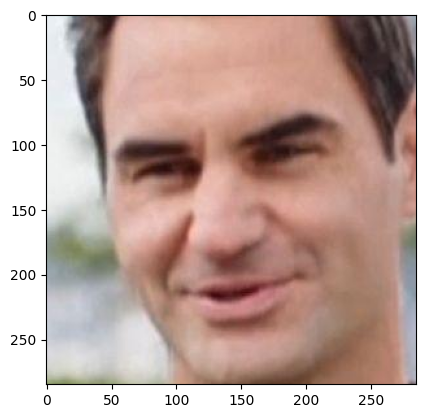

In [566]:
#Roger_Federer example
img1 = cv2.imread(celebrity_file_name_dict['Roger_Federer'][0])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

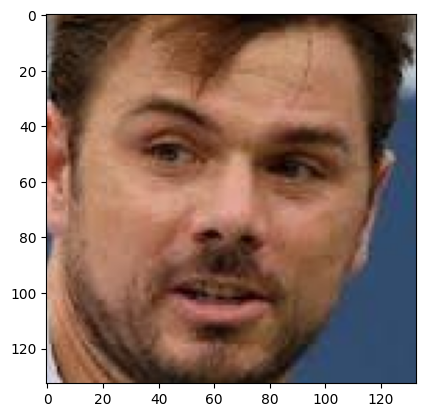

In [550]:
#Stan Wawrinka example
img2 = cv2.imread(celebrity_file_name_dict['Stan_Wawrinka'][10])
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

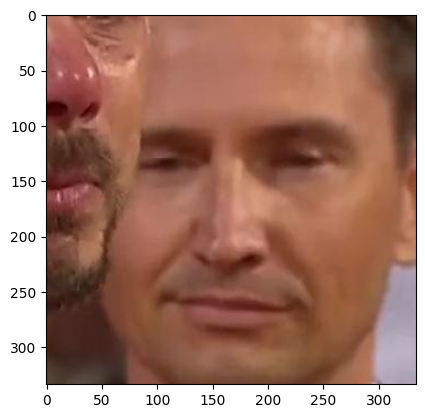

In [551]:
#Stan Wawrinka example but WRONG data!
img3 = cv2.imread(celebrity_file_name_dict['Stan_Wawrinka'][2])
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

- Here, notice that the collected images captured a wrong person in dataset.
- This is where our manual adjustments comes into play.
- I will proceed this project by deleting the wrong images in directory through a simple eye-balling.

## 5. Feature Engineering-2
- We performed the first feature engineering on dataset by cropping our region of interest.
- To enrich our data with more features, we are going to use wavelet transformation.

In [553]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

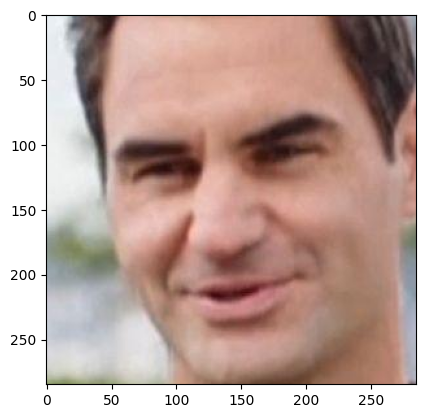

In [560]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR), cmap='gray')

### - Transformed image example

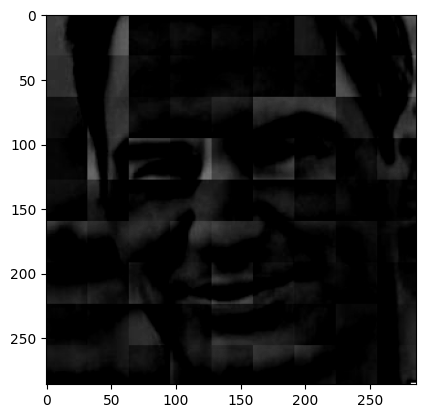

In [563]:
img_har = w2d(img1,'db1', 5)
plt.imshow(img_har, cmap='gray')

## 6. Construct training data (featrues, labels)
- Up to this part, we have all methods for transforming image features.
- We will finally create a advanced dataset by stacking original image with transformed image vertically after flattening them out.
- Thus, the features of data will be the stacked image, and the ground truth will be automatically generated neumerical value (i.e, 0-5 for each player).


### 6-a. Resize Images
- The original size of image too big to train our models.
- Thus, we resize(down-size) the images to train our model faster.
- Possible size would be (64,64), (32,32), etc.

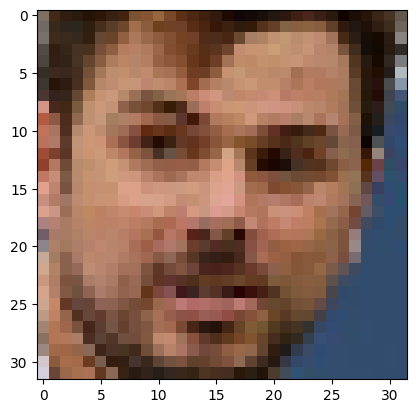

In [782]:
scaled_img = cv2.resize(img2,(32,32))
plt.imshow(cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB))

In [567]:
#construct labels
class_dict = {}
for i,n in enumerate(celebrity_file_name_dict.keys()):
    class_dict[n] = i
class_dict

{'Denis_Shapovalov': 0,
 'Gael_Monfils': 1,
 'Carlos_Alcaraz': 2,
 'Stan_Wawrinka': 3,
 'Roger_Federer': 4}

### 6-b. Training Dataset for 2 eyes & At least 1 eye detected images

In [756]:
############################### Images with both eyes detected ###############################
X = [] #to store data
y = [] #to store labels

for name, files in celebrity_file_name_dict.items():
    for img in files:
        #original image
        img = cv2.imread(img)
        if img is None:
            continue
        scaled_img = cv2.resize(img,(32,32))
        
        #transform the image
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        
        #vectorize and stack the images
        combined_image = np.vstack((scaled_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[name])

############################### Images with at least 1 eye detected ###############################
X1 = [] #to store data
y1 = [] #to store labels

for name, files in celebrity_file_name_dict_1_eye.items():
    for img in files:
        #original image
        img = cv2.imread(img)
        if img is None:
            continue
        scaled_img = cv2.resize(img,(32,32))
        
        #transform the image
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        
        #vectorize and stack the images
        combined_image = np.vstack((scaled_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X1.append(combined_image)
        y1.append(class_dict[name])

[ WARN:0@505260.683] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils0.png'): can't open/read file: check file path/integrity
[ WARN:0@505260.684] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils2.png'): can't open/read file: check file path/integrity
[ WARN:0@505260.686] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils5.png'): can't open/read file: check file path/integrity
[ WARN:0@505260.693] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils10.png'): can't open/read file: check file path/integrity
[ WARN:0@505260.702] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils15.png'): can't open/read file: check file path/integrity
[ WARN:0@505260.707] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop/Gael_Monfils/Gael_Monfils18.png'): can't open/read file: che

[ WARN:0@505261.549] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop_1eye/Roger_Federer/Roger_Federer34.png'): can't open/read file: check file path/integrity
[ WARN:0@505261.611] global loadsave.cpp:244 findDecoder imread_('./ImageData/ImageCrop_1eye/Roger_Federer/Roger_Federer50.png'): can't open/read file: check file path/integrity


In [757]:
combined_image.shape

(4096, 1)

### 6-c. Processed Data Information
- Simply ignore the warnings above since it's due to the manual data deletion.
- Note the number of collected images with at leats 1 eye detected is larger than those with 2 eyes detected.\
I incorporate the images here to **increase the chance of training a model better with more data**.

In [758]:
print('*'*20, "Dataset with 2 eyes detected", '*'*20)
print("Length of data : ", len(X))
print("The shape of each data : ", X[0].shape)
print("The length of each data : ",len(X[0]))
print("The number of labels : ",len(y))

print('*'*20, "Dataset with at least 1 eye detected", '*'*20)
print("Length of data : ", len(X1))
print("The shape of each data : ", X1[0].shape)
print("The length of each data : ",len(X1[0]))
print("The number of labels : ",len(y1))


******************** Dataset with 2 eyes detected ********************
Length of data :  138
The shape of each data :  (4096, 1)
The length of each data :  4096
The number of labels :  138
******************** Dataset with at least 1 eye detected ********************
Length of data :  187
The shape of each data :  (4096, 1)
The length of each data :  4096
The number of labels :  187


In [636]:
#32*32*3 + 32 = 4096

# Resized origianl image size + transformed image size
# 64*64*3 + 64*64

16384

### 6-b.Flatten out the features
- To feed the data into our model, we reshape the data into a vectorized format.

In [761]:
#convert to float
X = np.array(X).reshape(len(X),4096).astype(float)
X1 = np.array(X1).reshape(len(X1),4096).astype(float)
print(X.shape)
print(X1.shape)

(138, 4096)
(187, 4096)


In [762]:
X[0]

array([95., 46., 30., ...,  4.,  0.,  0.])

## 7. Traning models
- I will use SVM here because SVM is effective in handling high-dimesion data such as images.


In [763]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### 7-a. Score with Training data (2-eyes)

In [764]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#construct pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))]) #default parameters for now, finetuing later

#train the model
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4857142857142857

### 7-b. Score with Training data (1-eye)
- Note that taking more data into account resulted in significant improvement!

In [766]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

#train the model
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7872340425531915

In [767]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.50      0.67         6
           2       0.73      1.00      0.84         8
           3       0.76      0.87      0.81        15
           4       0.75      0.75      0.75        12

    accuracy                           0.79        47
   macro avg       0.85      0.76      0.77        47
weighted avg       0.81      0.79      0.78        47



### Testing different models & Hyperparameter tuning with GridSearchCV
- Here, we want to find out the best model by tuning hyper-parameters

In [768]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [769]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{ 
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [770]:
import pandas as pd
scores = [] #to store overall results
best_estimators = {} #to store best result for each model

for model,model_info in model_params.items():
    #create pipeline
    pipe = make_pipeline(StandardScaler(),model_info['model'])
    clf = GridSearchCV(pipe, model_info['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train) #gridsearch internally split train / validation
    scores.append({
        'model':model,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[model] = clf.best_estimator_
    

In [771]:
#scores on validation set
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.721429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.664286,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.707143,{'logisticregression__C': 1}


## 8. Scores on Test set & Confusion Matrix
- To measure the performance of the model, we plot the confusion matrix and see important metrics such as precision, recall, f1-score.

In [772]:
best_estimators['svm'].score(X_test,y_test)

0.7659574468085106

In [773]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8297872340425532

In [774]:
best_estimators['random_forest'].score(X_test,y_test)

0.6808510638297872

### 8-a. Pick the best model
- From the 'Logistic Regression' model, we can observe the pretty good outputs based on metrics below.

In [775]:
best_clf = best_estimators['logistic_regression']

In [781]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.67      0.80         6
           2       0.73      1.00      0.84         8
           3       1.00      0.93      0.97        15
           4       1.00      0.58      0.74        12

    accuracy                           0.83        47
   macro avg       0.85      0.84      0.81        47
weighted avg       0.90      0.83      0.83        47



In [776]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0],
       [ 2,  4,  0,  0,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  1, 14,  0],
       [ 3,  0,  2,  0,  7]])

Text(95.72222222222221, 0.5, 'Ground Truth')

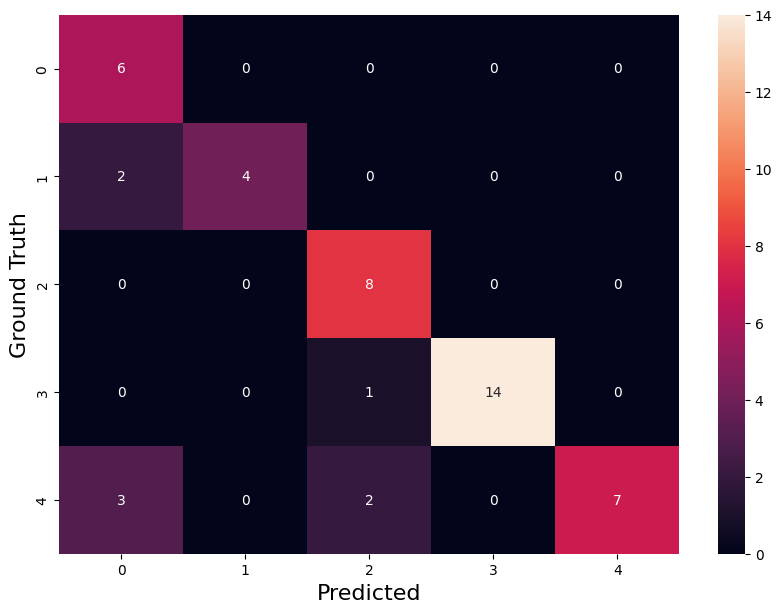

In [777]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')


In [779]:
class_dict

{'Denis_Shapovalov': 0,
 'Gael_Monfils': 1,
 'Carlos_Alcaraz': 2,
 'Stan_Wawrinka': 3,
 'Roger_Federer': 4}

## 8. Save the model & Save class dictionary
- Now, we have both class dictionary and the trained model.
- These items will be used in backend while we deploy the model on web-application.

In [780]:
import joblib
import json

#Save the model
joblib.dump(best_clf, 'saved_model.pkl')

#save the class dictionary
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))